# КРИПТОГРАФИЈА - LAB1

#### 151027, Fisnik Limani

## Материјал:

#### Research Paper: FREQUENCY  DISTRIBUTION OF LETTERS, BIGRAMS AND TRIGRAMS IN THE MACEDONIAN LANGUAGE
#### Link: http://js.ugd.edu.mk/index.php/YFCS/article/view/27/1035

In [308]:
# Податоци земени од горенаведеното истражување за униграмите, биграмите и триграмите на македонскиот јазик
unigrams = {
    'А': 13.293, 'О': 10.679, 'И': 9.160, 'Е': 8.945, 'Т': 7.462,
    'Н': 7.077,  'Р': 5.090,  'С': 4.751, 'В': 4.343, 'Д': 3.911,
    'К': 3.672,  'Л': 2.959,  'П': 2.926, 'М': 2.309, 'У': 2.262,
    'З': 1.979,  'Ј': 1.511,  'Г': 1.505, 'Б': 1.434, 'Ч': 0.925,
    'Ш': 0.916,  'Ц': 0.857,  'Ж': 0.568, 'Њ': 0.555, 'Ф': 0.347, 
    'Ќ': 0.264,  'Х': 0.146,  'Г': 0.106, 'Џ': 0.025, 'Љ': 0.015,
    'Ѕ': 0.009,
}

bigrams = {
    'НА': 3.235, 'АТ': 1.860, 'ТА': 1.808, 'НИ': 1.764, 'ТЕ': 1.721,
    'РА': 1.688, 'ОТ': 1.616, 'СТ': 1.614, 'ТО': 1.541, 'КО': 1.456,
    'ВА': 1.455, 'ВО': 1.445, 'ЕН': 1.414, 'ОД': 1.375, 'ПР': 1.271,
    'РЕ': 1.234, 'КА': 1.215, 'ИТ': 1.197, 'ПО': 1.191, 'НО': 1.161, 
    'ЗА': 1.125, 'ДА': 0.983, 'ЈА': 0.981, 'СЕ': 0.958, 'УВ': 0.901,
    'РИ': 0.895, 'ОВ': 0.887, 'ТИ': 0.874, 'ЛИ': 0.859, 'РО': 0.839
}

trigrams = {
    'ИТЕ': 1.261, 'АТА': 1.147, 'УВА': 1.124, 'ИЈА': 0.709, 'АЊЕ': 0.639,
    'СТА': 0.612, 'ОСТ': 0.579, 'ВАЊ': 0.483, 'ПРО': 0.479, 'ПРЕ': 0.476,
    'ЕТО': 0.429, 'ИСТ': 0.412, 'РЕД': 0.407, 'АКО': 0.405, 'НАТ': 0.393,
    'ИРА': 0.367, 'ШТО': 0.362, 'НОС': 0.356, 'ЕНИ': 0.356, 'АНИ': 0.348,
    'ПРИ': 0.340, 'ИОТ': 0.331, 'НИТ': 0.329, 'ОТО': 0.323, 'ААТ': 0.318,
    'ОВИ': 0.309, 'РАН': 0.305, 'ИНА': 0.305, 'СКИ': 0.295, 'МЕН': 0.292
}

In [309]:
# Го читаме file-от каде го имаме ciphertext-oт

path = 'cipher/encrypted_text.txt'
# Encoding треба да е utf-8 затоа што ciphertext-от е на кирилица
cipher = open(path,'r', encoding='utf-8') 

ciphertext = cipher.read()
ciphertext

'НШГЖИЛЏЛЈЛВШЃЅНЈЧЗШЛЃТГЃЅШЖГЃЃГЈЗЦБЖЛЏЧФГЈЃЅАЏЅЏЧФЛСЈНЃЅГЃСЈФГЈЦБЏЏНЈЧЗЃЧШЅСЧВЈФЅЈСШЅШВШГЈЅЈЛВШЈФЅЈСШКЏЅШНШГЖИЛЏЛВШЃЅНЈЧЗШЛЃТГЃЅШЖГЃЃГЈЗЦБЖЛЏЧФГЈЃЅАЏЅЏЧФЛСЈСЈФЈФЛШСЅШЖЅЃСЏЧВЃЛЏЛЈЛФСГЃЧЃИЃЗЏЛЈЌЃБФГЈЦБЏЈРБШСЏЅСЈФИЖАРЏЅСЏФЅЃГЅШЧЗВШГЈЅЈЛФЛШЦЃЅШФЃИШЅШФЏЌЗЃБШЅЖШЧЃЌСЏЃИБШЌЃЃЏЌЃЅШЏФЏЛЛШУЈЌЃЅШНШГЖИЛЏЛЈЛВШЃЅНЈЧЗШЛЃТГЃЅШЖГЃЃГЈЗЦБЖЛЏЧФГЈЃЅАЏЅЏЧФЛСЈНЃЅГЃЏЧЏВЖИЛШЛЅШВЌЧЖАЖСШКЏЛЈЅШЌСШЛШЅШБУЈИЏЗЃЃЅФЛЃЛЖЛЃЈЌЈРИШФЛШЅШЃЅНЈЧЗШЛЃГШЛШЃГЈЗЦБЖЛЏЧФГШЛШЛЏЊЅЃГШСЈЗШГЏЌЈЅЃБШЃЅФЛЃЛЖЛЈЛВШЃЅНЈЧЗШЛЃГШЃЃЦЧЃЦЧЃЧЈЌЅЈЗШЛЏЗШЛЃТГЃЈЛНШГЖИЛЏЛЃЃЅФЛЃЛЖЛЈЛВШГЈЗЦБЖЛЏЧФГШЛЏЊЅЃГШЃЃЅНЈЧЗШЛЃГШЃГЛЃЦЧЃНШГЖИЛЏЛЈЛВШЏИЏГЛЧЈЛЏЊЅЃГШЃЃЅНЈЧЗШМЃФГЃЛЏЊЅЈИЈУЃЃСЈЌШЌЏЅШЛШНЈЧЗШЌСШЛШЃЅФЛЃЛЖЛЃЧШРЈЛШЛЖПЛЏЈЌЈФЖЗЌЏФЏЛЛЃЛЏУЈЌЃЅЃЅШЗЃЅШЛЃЈЛСЏГЃЃЦЈТЅЖСШЌШЧШРЈЛЃЈЌЌШИЏТЅШЛШЈФЖЗЌЏФЏЛЃЦЏЛЛШУЈЌЃЅШГШГЈЧШЗЅЈЦЧШСЅШФЈФЛШСЅШМЏИЃЅШЅШЦЈСЛЈЧЅЈЈРЏЌЃЅЏЛЃЈЛЦЗНЦЈЌЃЗЏЛЈЃЅФЛЃЛЖЛВШЃЅНЈЧЗШЛЃГШЃГЛЃЦЈЛЏГЅЖСШЈЌГШЛЏЌЧШЛШВШЛЏЊЅЃТГШГЃРЏЧЅЏЛЃГШСЈЈСЈБЦЏЧЃЈЌЈЌФГЈЧЈЛЃЅШУЈЌЃЅЃГШБЈСЃЏЃЅФЛЃЛЖЛЃФЏФИЖТЖСШЦЈФЛЈБШЅЧШФЛСЈЅШЖТЅЃЛЏЃЛЏЊЅЃТГЃЛЏГШЦШМЃЛЏЛЃГШГЈЧЏВЖИЛШЛЅШЃВСЈЅЧЏЌЅЃЛЏВШИШУШКШЅШЅЃСЅЃЛЏТИЏ

In [310]:
def find_letter_frequencies(ciphertext):
    """
        Функција која ќе ги најде фреквенциите за секоја буква од текстот
        Return value: lista од tuples каде tuple[0] - буква, tuple[1] - фреквенција, сортирани по фреквенција
    """
    letter_frequencies = dict()
    for character in ciphertext:
        if character not in letter_frequencies:
            letter_frequencies[character] = 1
        else:
            letter_frequencies[character] += 1
    
    ciphertext_length = len(ciphertext)
    
    for character in letter_frequencies:
        # print(letter_frequencies[character], ciphertext_length)
        letter_frequencies[character]=round(letter_frequencies[character]/ciphertext_length*100,2)
        
    # SORT
    frequencies = list(letter_frequencies.items())
    frequencies.sort(key=lambda item:item[1], reverse=True)
    
    return frequencies

In [311]:
# Ќе се искористи plotly библиотеката за да се направи визуелизација на податоците
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [312]:
letter_frequencies = find_letter_frequencies(ciphertext)
x = [item[0] for item in letter_frequencies]
y = [item[1] for item in letter_frequencies]
data = go.Bar(x = x, y = y)
fig = go.Figure(data)
fig.show()

In [313]:
# Ќе дадеме графички приказ на фреквенциите на буквите од дадениот ciphertext и од податоците од истражувањето
# за да видиме некаква потенцијална корелација

ciphertext_letter_frequencies = {
    "x": x,
    "y": y,
    "mode": "markers",
    "marker": {"color": "red", "size": 5},
    "name": "Ciphertext Letter Frequencies"
}
research_letter_frequencies = {
    "x": list(unigrams.keys()),
    "y": list(unigrams.values()),
    "mode": "markers",
    "marker": {"color": "blue", "size": 5},
    "name": "Research Letter Frequencies"
}
data = [ciphertext_letter_frequencies,research_letter_frequencies]

iplot(data)

In [314]:
def find_bigrams_frequencies(ciphertext):
    bigram_frequencies = dict()
    for i in range(len(ciphertext)-1):
        bigram = ciphertext[i] + ciphertext[i+1]
        if bigram not in bigram_frequencies:
            bigram_frequencies[bigram] = 1
        else:
            bigram_frequencies[bigram] += 1
    
    total_bigrams = len(ciphertext)-1
    
    for bigram in bigram_frequencies:
        # print(letter_frequencies[character], ciphertext_length)
        bigram_frequencies[bigram]=round(bigram_frequencies[bigram]/total_bigrams*100,2)
        
    # SORT
    frequencies = list(bigram_frequencies.items())
    frequencies.sort(key=lambda item:item[1], reverse=True)
    
    return frequencies

In [315]:
ciphertext_bigrams = find_bigrams_frequencies(ciphertext)
# ciphertext_bigrams
x = [item[0] for item in ciphertext_bigrams[0:50]]
y = [item[1] for item in ciphertext_bigrams[0:50]]
data = go.Bar(x = x, y = y)
fig = go.Figure(data)
fig.show()

In [316]:
def find_trigrams_frequencies(ciphertext):
    trigram_frequencies = dict()
    for i in range(len(ciphertext)-2):
        trigram = ciphertext[i] + ciphertext[i+1] + ciphertext[i+2]
        if trigram not in trigram_frequencies:
            trigram_frequencies[trigram] = 1
        else:
            trigram_frequencies[trigram] += 1
    
    total_trigrams = len(ciphertext)-2
    
    for trigram in trigram_frequencies:
        # print(letter_frequencies[character], ciphertext_length)
        trigram_frequencies[trigram]=round(trigram_frequencies[trigram]/total_trigrams*100,2)
        
    # SORT
    frequencies = list(trigram_frequencies.items())
    frequencies.sort(key=lambda item:item[1], reverse=True)
    
    return frequencies

In [317]:
ciphertext_trigrams = find_trigrams_frequencies(ciphertext)
# ciphertext_trigrams
x = [item[0] for item in ciphertext_trigrams[0:50]]
y = [item[1] for item in ciphertext_trigrams[0:50]]
data = go.Bar(x = x, y = y)
fig = go.Figure(data)
fig.show()

# Објаснување

Имам искористено секаква метода, употребајќи ги фреквенциите на буквите, биграмите, триграмите за да ме однесат до целта да го декриптирам ciphertext-ot но секоја техника на крај стануваше многу конфузна и не ми даваше никаква значителна помош.

Сум пробал секакви математики за да го намалам доменот, обидејќи се да претпоставувам замени за некои букви на пр. Ѓ (најфреквентната буква) = {А, И, О, Е}, Буква X - согласка, Буква Y - самогласка итн., употребувајќи биграмите, триграмите од ciphertext-от и фреквенциите од истражувањето, но секоја техника доведеше до некоја контрадикција и никаква помош!

## Методи употребени при неуспешните обиди за декриптирање

In [318]:
# Го направив ciphertext-ot со мали букви за кога ќе правам некакви замени, замените да ми бидат со големи букви
# и така ќе ми стане повидливо тоа што е заменето
ciphertext = ciphertext.lower()

ciphertext.replace('ѓ', 'А')  # функција за замена на еден стринг/карактер со друг стринг/карактер

# функција за наоѓање на биграмите кои содржат исти букви
for tuple in ciphertext_bigrams:
    #print(tuple[0])
    if tuple[0][0]==tuple[0][1]:
        # print(tuple[0])
        pass

# Функција за наоѓање на триграмите кои содржат исти букви
for tuple in ciphertext_trigrams:
    #print(tuple[0])
    if tuple[0][0]==tuple[0][1] and tuple[0][1]==tuple[0][2]:
        # print(tuple[0])
        pass

# Функција за наоѓање на триграмите каде првите две букви се исти
for trigram in ciphertext_trigrams:
    #print(trigram[0])
    if trigram[0][0]==trigram[0][1]:
        # print(trigram)
        pass
    
# ... и некои други
# ... и неколку A4 листови за анализа

Потоа, одлучив да го искористам HINT-от дека во овој текст се зборува нешто за ФИНКИ.
Па на некаков начин како key-words ми беа:
- ФАКУЛТЕТ(ОТ)
- ИНФОРМАТИЧКИ
- НАУКИ
- КОМПЈУТЕРСКО
- ИНЖЕНЕРСТВО

Се обидев од ciphertextot да најдам најдолги pattern-i (секвенци) кои се повторуваат.

In [319]:
def find_ngram_frequencies(ciphertext, n):
    """
        Функција која најде n-grami во текстот
        Се чува само бројот на повторувања а не фреквенциите бидејќи кога n се зголемува
        фреквенциите станат се помали и можат да не ни даваат значителна информација
    """
    ngram_frequencies = dict()
    for i in range(len(ciphertext)-n-1):
        ngram = ''
        for j in range(n):
            ngram += ciphertext[i+j]
        if ngram not in ngram_frequencies:
            ngram_frequencies[ngram] = 1
        else:
            ngram_frequencies[ngram] += 1
    # SORT
    frequencies = list(ngram_frequencies.items())
    frequencies.sort(key=lambda item:item[1], reverse=True)
    
    return frequencies

In [320]:
# Повик на функција, пр.
fifteen_grams = find_ngram_frequencies(ciphertext, 15)

## Повикувајќи функцијaта со n={5,6,7,8,9,..} успеав да ги најдам овие секвенци:

#### Секвенца 1. ЃГЈЗЦБЖЛЏИФГЈЃЅАЏЅЏИФЛСЈ
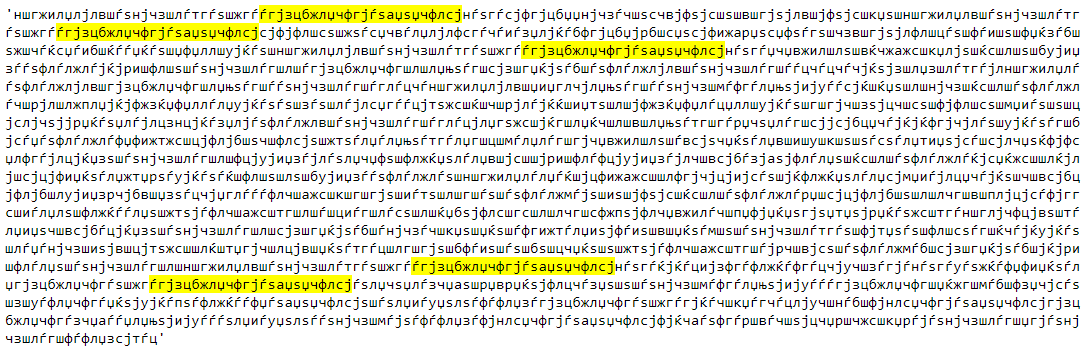

#### Секвенца 2. ЛВШЃЅНЈЧЗШЛЃТГЃЅШЖГЃЃГЈЗЦБЖЛЏЧФГЈЃЅА
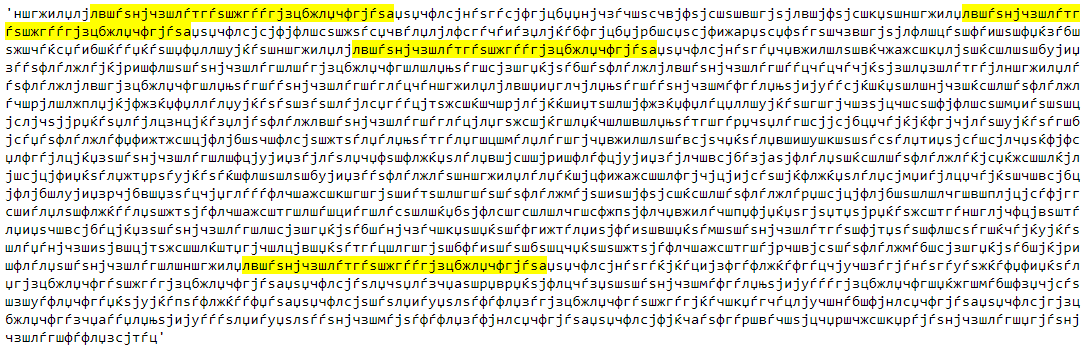

#### Секвенца 3. ЏЧФГЈЃЅАЏЅЏЧФЛСЈНЃЅГЃ
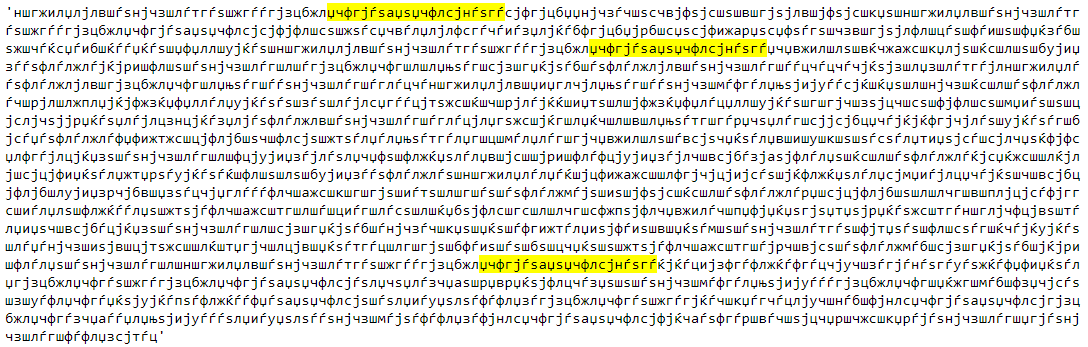

#### Секвенца 4. НШГЖИЛЏЛЈЛВШГЅНЈЧЗШЛЃТГЃЅ
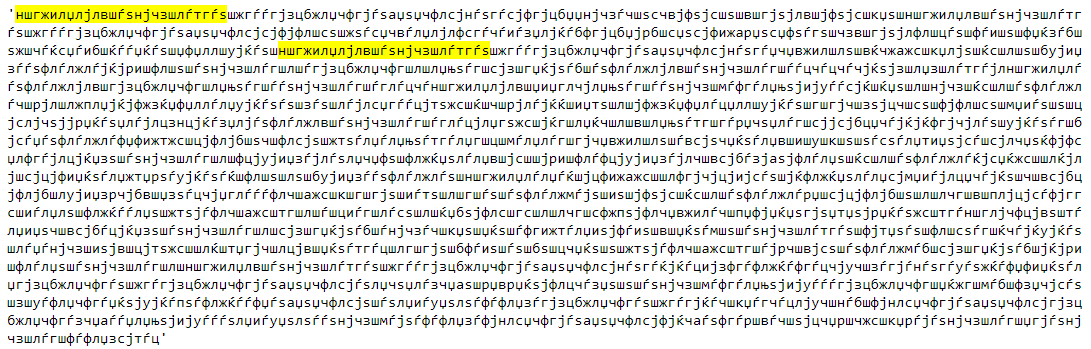

#### ... Уште некои други секвенци:
##### 5. ШНШГЖИЛЏЛВШЃЅНЈЧЗШЛЃТГЃЅ (2 пати повторена)
##### 6. ЅШБУЈИЏЗЃЃЅФЛЃЛЖЛЃ (2 пати повторена)
##### 7. ЃЅНЈЧЗШМЃФГЃЛЏЊЅЈИЈУЃЃ (2 пати повторена)


Потоа следеше анализа на key-words наведени погоре и видов дека покарактеристичен збор е:
### ФАКУЛТЕТ(ОТ)
бидејќи има еден дел од зборот во форма: Т\*Т(\*Т), значи има 2 или 3 букви исти и по една буква измеѓу тие истите букви.

Потоа се обидев да најдам таков помал pattern внатре во подолгите секвенци, особено во четвртата секвенца која освен што се повторува, се појавува исто така на почеток, така да има голема веројатност да e key-word-от таму.

Кај првата, втората и третата секвенца немаше таков pattern. Кај четвртата ДА. Од таму можеме да ги извлечиме замените:

### 1. Н ~ Ф
### 2. Ш ~ А
### 3. Г ~ К
### 4. Ж ~ У
### 5. И ~ Л
### 6. Л ~ Т
### 7. Џ ~ Е
### 8. Ј ~ О

Потоа со мали проверки лесно се продолжува со замените:
### 9.   В ~ З
### 10. Ѓ ~ И
### 11. Ѕ ~ Н
### 12. Ч ~ Р
### 13. З ~ М
### 14. Т ~ Ч

In [321]:
# Да ги имплементираме тие промени со код
ciphertext = ciphertext.replace('н', 'Ф') # 1
ciphertext = ciphertext.replace('ш', 'А') # 2
ciphertext = ciphertext.replace('г', 'К') # 3
ciphertext = ciphertext.replace('ж', 'У') # 4
ciphertext = ciphertext.replace('и', 'Л') # 5
ciphertext = ciphertext.replace('л', 'Т') # 6
ciphertext = ciphertext.replace('џ', 'Е') # 7
ciphertext = ciphertext.replace('ј', 'О') # 8
ciphertext = ciphertext.replace('в', 'З') # 9
ciphertext = ciphertext.replace('ѓ', 'И') # 10
ciphertext = ciphertext.replace('ѕ', 'Н') # 11
ciphertext = ciphertext.replace('ч', 'Р') # 12
ciphertext = ciphertext.replace('з', 'М') # 13
ciphertext = ciphertext.replace('т', 'Ч') # 14
ciphertext

'ФАКУЛТЕТОТЗАИНФОРМАТИЧКИНАУКИИКОМцбУТЕРфКОИНаЕНЕРфТсОФИНКИсОфКОцбЕЕФОРМИРАНсРЗОфНОсАНАЗАКОНОТЗАОфНОсАкЕНАФАКУЛТЕТЗАИНФОРМАТИЧКИНАУКИИКОМцбУТЕРфКОИНаЕНЕРфТсОсОфОфТАсНАУНИсЕРЗИТЕТОТфсКИРИЛИМЕТОќИбфКОцбЕОрбАсЕНсОфЛУарЕНсЕфНИКНАРМЗАКОНОТфТАцИНАфИЛАНАфЕќМИбАНУАРИќсЕИЛбАќИИЕќИНАЕфЕТТАуОќИНАФАКУЛТЕТОТЗАИНФОРМАТИЧКИНАУКИИКОМцбУТЕРфКОИНаЕНЕРфТсОФИНКИЕРЕЗУЛТАТНАЗќРУаУсАкЕТОНАќсАТАНАбуОЛЕМИИНфТИТУТИОќОрЛАфТАНАИНФОРМАТИКАТАИКОМцбУТЕРфКАТАТЕњНИКАсОМАКЕќОНИбАИНфТИТУТОТЗАИНФОРМАТИКАИИцРИцРИРОќНОМАТЕМАТИЧКИОТФАКУЛТЕТИИНфТИТУТОТЗАКОМцбУТЕРфКАТЕњНИКАИИНФОРМАТИКАИКТИцРИФАКУЛТЕТОТЗАЕЛЕКТРОТЕњНИКАИИНФОРМАмИфКИТЕњНОЛОуИИсОќАќЕНАТАФОРМАќсАТАИНфТИТУТИРАрОТАТУпТЕОќОфУМќЕфЕТТИТЕуОќИНИНАМИНАТИОТсЕКИИцОЧНУсАќАРАрОТИОќќАЛЕЧНАТАОфУМќЕфЕТИцЕТТАуОќИНАКАКОРАМНОцРАсНАфОфТАсНАмЕЛИНАНАцОсТОРНООрЕќИНЕТИОТцМФцОќИМЕТОИНфТИТУТЗАИНФОРМАТИКАИКТИцОТЕКНУсАОќКАТЕќРАТАЗАТЕњНИЧКАКИрЕРНЕТИКАсООсОбцЕРИОќОќфКОРОТИНАуОќИНИКАбОсИЕИНфТИТУТИфЕфЛУЧУсАцОфТОбАНРАфТсОНАУЧНИТЕИТЕњНИЧКИТЕКАцАмИТЕТИКАКОРЕЗУЛТАТНАИЗсОНРЕќНИТЕЗАЛАуАкАНАНИсНИТЕЧЛЕ

Сега од текстот може лесно да се подразбираат замените:

### 15. Ц ~ П
### 16. Б ~ Ј
### 17. Ф ~ С
### 18. А ~ Ж
### 19. С ~ В

In [322]:
# Нека ги имплементираме овие следни промени
ciphertext = ciphertext.replace('ц', 'П') # 15
ciphertext = ciphertext.replace('б', 'Ј') # 16
ciphertext = ciphertext.replace('ф', 'С') # 17
ciphertext = ciphertext.replace('а', 'Ж') # 18
ciphertext = ciphertext.replace('с', 'В') # 19
ciphertext

'ФАКУЛТЕТОТЗАИНФОРМАТИЧКИНАУКИИКОМПЈУТЕРСКОИНЖЕНЕРСТВОФИНКИВОСКОПЈЕЕФОРМИРАНВРЗОСНОВАНАЗАКОНОТЗАОСНОВАкЕНАФАКУЛТЕТЗАИНФОРМАТИЧКИНАУКИИКОМПЈУТЕРСКОИНЖЕНЕРСТВОВОСОСТАВНАУНИВЕРЗИТЕТОТСВКИРИЛИМЕТОќИЈСКОПЈЕОрЈАВЕНВОСЛУЖрЕНВЕСНИКНАРМЗАКОНОТСТАПИНАСИЛАНАСЕќМИЈАНУАРИќВЕИЛЈАќИИЕќИНАЕСЕТТАуОќИНАФАКУЛТЕТОТЗАИНФОРМАТИЧКИНАУКИИКОМПЈУТЕРСКОИНЖЕНЕРСТВОФИНКИЕРЕЗУЛТАТНАЗќРУЖУВАкЕТОНАќВАТАНАЈуОЛЕМИИНСТИТУТИОќОрЛАСТАНАИНФОРМАТИКАТАИКОМПЈУТЕРСКАТАТЕњНИКАВОМАКЕќОНИЈАИНСТИТУТОТЗАИНФОРМАТИКАИИПРИПРИРОќНОМАТЕМАТИЧКИОТФАКУЛТЕТИИНСТИТУТОТЗАКОМПЈУТЕРСКАТЕњНИКАИИНФОРМАТИКАИКТИПРИФАКУЛТЕТОТЗАЕЛЕКТРОТЕњНИКАИИНФОРМАмИСКИТЕњНОЛОуИИВОќАќЕНАТАФОРМАќВАТАИНСТИТУТИРАрОТАТУпТЕОќОСУМќЕСЕТТИТЕуОќИНИНАМИНАТИОТВЕКИИПОЧНУВАќАРАрОТИОќќАЛЕЧНАТАОСУМќЕСЕТИПЕТТАуОќИНАКАКОРАМНОПРАВНАСОСТАВНАмЕЛИНАНАПОВТОРНООрЕќИНЕТИОТПМФПОќИМЕТОИНСТИТУТЗАИНФОРМАТИКАИКТИПОТЕКНУВАОќКАТЕќРАТАЗАТЕњНИЧКАКИрЕРНЕТИКАВООВОЈПЕРИОќОќСКОРОТИНАуОќИНИКАЈОВИЕИНСТИТУТИСЕСЛУЧУВАПОСТОЈАНРАСТВОНАУЧНИТЕИТЕњНИЧКИТЕКАПАмИТЕТИКАКОРЕЗУЛТАТНАИЗВОНРЕќНИТЕЗАЛАуАкАНАНИВНИТЕЧЛЕ

Продолжуваме со замени:

### 20. К ~ Њ
### 21. Ќ ~ Д
### 22. Р ~ Б
### 23. У ~ Г
### 24. Њ ~ Х
### 25. М ~ Ц
### 26. П ~ Ш

In [323]:
# Продолжуваме со имплементирање на замените
ciphertext = ciphertext.replace('к', 'Њ') # 20
ciphertext = ciphertext.replace('ќ', 'Д') # 21
ciphertext = ciphertext.replace('р', 'Б') # 22
ciphertext = ciphertext.replace('у', 'Г') # 23
ciphertext = ciphertext.replace('њ', 'Х') # 24
ciphertext = ciphertext.replace('м', 'Ц') # 25
ciphertext = ciphertext.replace('п', 'Ш') # 26
ciphertext

'ФАКУЛТЕТОТЗАИНФОРМАТИЧКИНАУКИИКОМПЈУТЕРСКОИНЖЕНЕРСТВОФИНКИВОСКОПЈЕЕФОРМИРАНВРЗОСНОВАНАЗАКОНОТЗАОСНОВАЊЕНАФАКУЛТЕТЗАИНФОРМАТИЧКИНАУКИИКОМПЈУТЕРСКОИНЖЕНЕРСТВОВОСОСТАВНАУНИВЕРЗИТЕТОТСВКИРИЛИМЕТОДИЈСКОПЈЕОБЈАВЕНВОСЛУЖБЕНВЕСНИКНАРМЗАКОНОТСТАПИНАСИЛАНАСЕДМИЈАНУАРИДВЕИЛЈАДИИЕДИНАЕСЕТТАГОДИНАФАКУЛТЕТОТЗАИНФОРМАТИЧКИНАУКИИКОМПЈУТЕРСКОИНЖЕНЕРСТВОФИНКИЕРЕЗУЛТАТНАЗДРУЖУВАЊЕТОНАДВАТАНАЈГОЛЕМИИНСТИТУТИОДОБЛАСТАНАИНФОРМАТИКАТАИКОМПЈУТЕРСКАТАТЕХНИКАВОМАКЕДОНИЈАИНСТИТУТОТЗАИНФОРМАТИКАИИПРИПРИРОДНОМАТЕМАТИЧКИОТФАКУЛТЕТИИНСТИТУТОТЗАКОМПЈУТЕРСКАТЕХНИКАИИНФОРМАТИКАИКТИПРИФАКУЛТЕТОТЗАЕЛЕКТРОТЕХНИКАИИНФОРМАЦИСКИТЕХНОЛОГИИВОДАДЕНАТАФОРМАДВАТАИНСТИТУТИРАБОТАТУШТЕОДОСУМДЕСЕТТИТЕГОДИНИНАМИНАТИОТВЕКИИПОЧНУВАДАРАБОТИОДДАЛЕЧНАТАОСУМДЕСЕТИПЕТТАГОДИНАКАКОРАМНОПРАВНАСОСТАВНАЦЕЛИНАНАПОВТОРНООБЕДИНЕТИОТПМФПОДИМЕТОИНСТИТУТЗАИНФОРМАТИКАИКТИПОТЕКНУВАОДКАТЕДРАТАЗАТЕХНИЧКАКИБЕРНЕТИКАВООВОЈПЕРИОДОДСКОРОТИНАГОДИНИКАЈОВИЕИНСТИТУТИСЕСЛУЧУВАПОСТОЈАНРАСТВОНАУЧНИТЕИТЕХНИЧКИТЕКАПАЦИТЕТИКАКОРЕЗУЛТАТНАИЗВОНРЕДНИТЕЗАЛАГАЊАНАНИВНИТЕЧЛЕ

### Декриптираниот текст ќе го прикажеме подолу (за да стане почитлив ќе ги ставиме рачно празните места):

ФАКУЛТЕТОТ ЗА ИНФОРМАТИЧКИ НАУКИ И КОМПЈУТЕРСКО ИНЖЕНЕРСТВО ФИНКИ ВО СКОПЈЕ Е ФОРМИРАН ВРЗ ОСНОВА НА ЗАКОНОТ ЗА ОСНОВАЊЕ НА ФАКУЛТЕТ ЗА ИНФОРМАТИЧКИ НАУКИ И КОМПЈУТЕРСКО ИНЖЕНЕРСТВО ВО СОСТАВ НА УНИВЕРЗИТЕТОТ СВ КИРИЛ И МЕТОДИЈ СКОПЈЕ ОБЈАВЕН ВО СЛУЖБЕН ВЕСНИК НА РМ ЗАКОНОТ СТАПИ НА СИЛА НА СЕДМИ ЈАНУАРИ ДВЕ ИЛЈАДИ И ЕДИНАЕСЕТТА ГОДИНА ФАКУЛТЕТОТ ЗА ИНФОРМАТИЧКИ НАУКИ И КОМПЈУТЕРСКО ИНЖЕНЕРСТВО ФИНКИ Е РЕЗУЛТАТ НА ЗДРУЖУВАЊЕТО НА ДВАТА НАЈГОЛЕМИ ИНСТИТУТИ ОД ОБЛАСТА НА ИНФОРМАТИКАТА И КОМПЈУТЕРСКАТА ТЕХНИКА ВО МАКЕДОНИЈА ИНСТИТУТОТ ЗА ИНФОРМАТИКА И И ПРИПРИРОДНО МАТЕМАТИЧКИОТ ФАКУЛТЕТ И ИНСТИТУТОТ ЗА КОМПЈУТЕРСКА ТЕХНИКА И ИНФОРМАТИКА ИКТИ ПРИ ФАКУЛТЕТОТ ЗА ЕЛЕКТРОТЕХНИКА И ИНФОРМАЦИСКИ ТЕХНОЛОГИИ ВО ДАДЕНАТА ФОРМА ДВАТА ИНСТИТУТИ РАБОТАТ УШТЕ ОД ОСУМДЕСЕТТИТЕ ГОДИНИ НА МИНАТИОТ ВЕК ИИ ПОЧНУВА ДА РАБОТИ ОДДАЛЕЧНАТА ОСУМДЕСЕТИ ПЕТТА ГОДИНА КАКО РАМНОПРАВНА СОСТАВ НА ЦЕЛИНА НА ПОВТОРНО ОБЕДИНЕТИОТ ПМФ ПОД ИМЕТО ИНСТИТУТ ЗА ИНФОРМАТИКА ИКТИ ПОТЕКНУВА ОД КАТЕДРАТА ЗА ТЕХНИЧКА КИБЕРНЕТИКА ВО ОВОЈ ПЕРИОД ОД СКОРО ТИНА ГОДИНИ КАЈ ОВИЕ ИНСТИТУТИ СЕ СЛУЧУВА ПОСТОЈАН РАСТ ВОНАУЧНИТЕ И ТЕХНИЧКИТЕ КАПАЦИТЕТИ КАКО РЕЗУЛТАТ НА ИЗВОНРЕДНИТЕ ЗАЛАГАЊА НА НИВНИТЕ ЧЛЕНОВИ А ВО ТРЕНД СО СВЕТСКИОТ ПОДЕМ НА ИНФОРМАТИКАТА С ПОГОЛЕМИОТ ИНТЕРЕС НА СТУДЕНТИТЕ ЗА ОВАА ОБЛАСТ И С ПОГОЛЕМИОТ РАЗВОЈ И МОЖНОСТИТЕ НА ДВАТА ИНСТИТУТИ ДОВЕДУВААТ ДО ТОА ВОПОСЛЕДНИТЕ УЧЕБНИ ГОДИНИ ДА СТАНАТ НАЈГОЛЕМИ ИНСТИТУТИ НА ФАКУЛТЕТИТЕ И ДА ОПСЛУЖУВААТ СКОРО ПОЛОВИНА ОД СТУДЕНТИТЕ ВО ЦЕЛИОТ ПЕРИОД НА РАЗВОЈ ПОСТОЈАТ ГОЛЕМ БРОЈ ЗАЕМНИ ПРОЕКТИ И ИСТРАЖУВАЊА КАКО НА ЛИЧНА ТАКА И НА ИНСТИТУЦИОНАЛНА ОСНОВА ДВАТА ИНСТИТУТИ БЕА ВО ПОСТОЈАНАТА ТРКА ЗА ШТО ПОВИСОК КВАЛИТЕТ НА СТУДИИТЕ НАУЧНО ИСТРАЖУВАЧКАТА И АПЛИКАТИВНАТА ДЕЈНОСТ ВАКВАТА ТРКА ВСУШНОСТ РЕЗУЛТИРАШЕ СО ЕДЕН КОНЕЧЕН ОБЕДИНУВАЧКИ ФАКТОР С ПОЗНАЧИТЕЛЕН РАЗВОЈ И ПОДЕМ НА ИНФОРМАТИКАТА ВО МАКЕДОНИЈА И ФОРМИРАЊЕ НА ЕДНА ИСКЛУЧИТЕЛНО СИЛНА ЗАЕДНИЦА НА ИНФОРМАТИЧКИ НАСОЧЕНИ НАСТАВНИ КАДРИ ОД ГОДИНА ТИЕ И ФОРМАЛНО ЗАПОЧНУВААТ ДА ЧЕКОРАТ ПОЗАЕДНИЧКИ ПАТ КАКО НАЈСИЛНА И НАЈНАПРЕДНА НАУЧНО ИСТРАЖУВАЧКА И ОБРАЗОВНА ИНСТИТУЦИЈА ВО МАКЕДОНИЈА ОД ОБЛАСТИТЕ НА ИНФОРМАТИКАТА ФАКУЛТЕТ ЗА ИНФОРМАТИЧКИ НАУКИ ИКОМПЈУТЕРСКО ИНЖЕНЕРСТВО ФИНКИ ДОДИПЛОМСКИ СТУДИСКИ ПРОГРАМИ КОИ ФИНКИ ГИ НУДИ СЕ СЛЕДНИТЕ КОМПЈУТЕРСКИ НАУК И КОМПЈУТЕРСКО ИНЖЕНЕРСТВО ИНТЕРНЕТ И МРЕЖНА БЕЗБЕДНОСТ ПРИМЕНА НА ИНФОРМАЦИСКИ ТЕХНОЛОГИИ И КОМПЈУТЕРСКА ЕДУКАЦИЈА СМЕРОВИ НА МАГИСТЕРСКИ ЕДНО ГОДИШНИ СТУДИИ СЕ ИНЖЕНЕРСТВО НА ИНТЕЛИГЕНТНИ СИСТЕМИ КОМПЈУТЕРСКИ НАУКИ КОДИРАЊЕ И КРИПТОГРАФИЈА СОФТВЕРСКО ИНЖЕНЕРСТВО КОМПЈУТЕРСКИ МРЕЖИ И ЕТЕХНОЛОГИИ ИНТЕЛИГЕНТНИ ИНФОРМАЦИОНИ СИСТЕМИ СОФТВЕРСКО ИНЖЕНЕРСТВО СОДРЖИНСКИ БАЗИРАН ОПРЕБАРУВАЊЕ БИОИНФОРМАТИКА ЕКО ИНФОРМАТИКА СИСТЕМ ВО ЧИП

### ЗАКЛУЧОК:

Клучот на оваа енкрипција е субституцијата:

1. Н ~ Ф
2. Ш ~ А
3. Г ~ К
4. Ж ~ У
5. И ~ Л
6. Л ~ Т
7. Џ ~ Е
8. Ј ~ О
9.   В ~ З
10. Ѓ ~ И
11. Ѕ ~ Н
12. Ч ~ Р
13. З ~ М
14. Т ~ Ч
15. Ц ~ П
16. Б ~ Ј
17. Ф ~ С
18. А ~ Ж
19. С ~ В
20. К ~ Њ
21. Ќ ~ Д
22. Р ~ Б
23. У ~ Г
24. Њ ~ Х
25. М ~ Ц
26. П ~ Ш